In [1]:
import joblib
import numpy as np
from typing import Tuple
import copy
import json
import os
from linkerology_multitask.ml_training import MultitaskTrainerBinary
from linkerology_multitask.plotting import SavedTrainerPlotter

In [2]:
def get_per_target_val_metrics(trainer:MultitaskTrainerBinary) -> Tuple[np.ndarray, np.ndarray]:
    min_loss_index = np.array(trainer.val_loss_history).argmin()
    return (
        trainer.per_target_val_accuracy_history[min_loss_index],
        trainer.per_target_val_f1_history[min_loss_index]
    )

def load_dataset(dataset_directory:str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, dict]:
    X_train = np.load(f'{dataset_directory}/linkerology_multitask_X_train.npy')
    X_test = np.load(f'{dataset_directory}/linkerology_multitask_X_test.npy')
    Y_train = np.load(f'{dataset_directory}/linkerology_multitask_Y_train.npy')
    Y_test = np.load(f'{dataset_directory}/linkerology_multitask_Y_test.npy')
    with open(os.path.join(dataset_directory, 'hyperparams.json'), 'r') as f:
        dataset_metadata=json.load(f)
    return X_train, X_test, Y_train, Y_test, dataset_metadata

In [3]:
# Read in parent output
with open('output/40nm_parent_ECFP12_2048bit_64_200_0001/trainer.joblib', 'rb') as f:
    parent_trainer = joblib.load(f)
with open('output/40nm_component_ECFP12_2048bit_64_200_0001/trainer.joblib', 'rb') as f:
    component_trainer = joblib.load(f)

/home/jacob.gerlach@corp.arvinas.com/Documents/repos/linkerology_multitask/venv/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/home/jacob.gerlach@corp.arvinas.com/Documents/repos/linkerology_multitask/venv/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


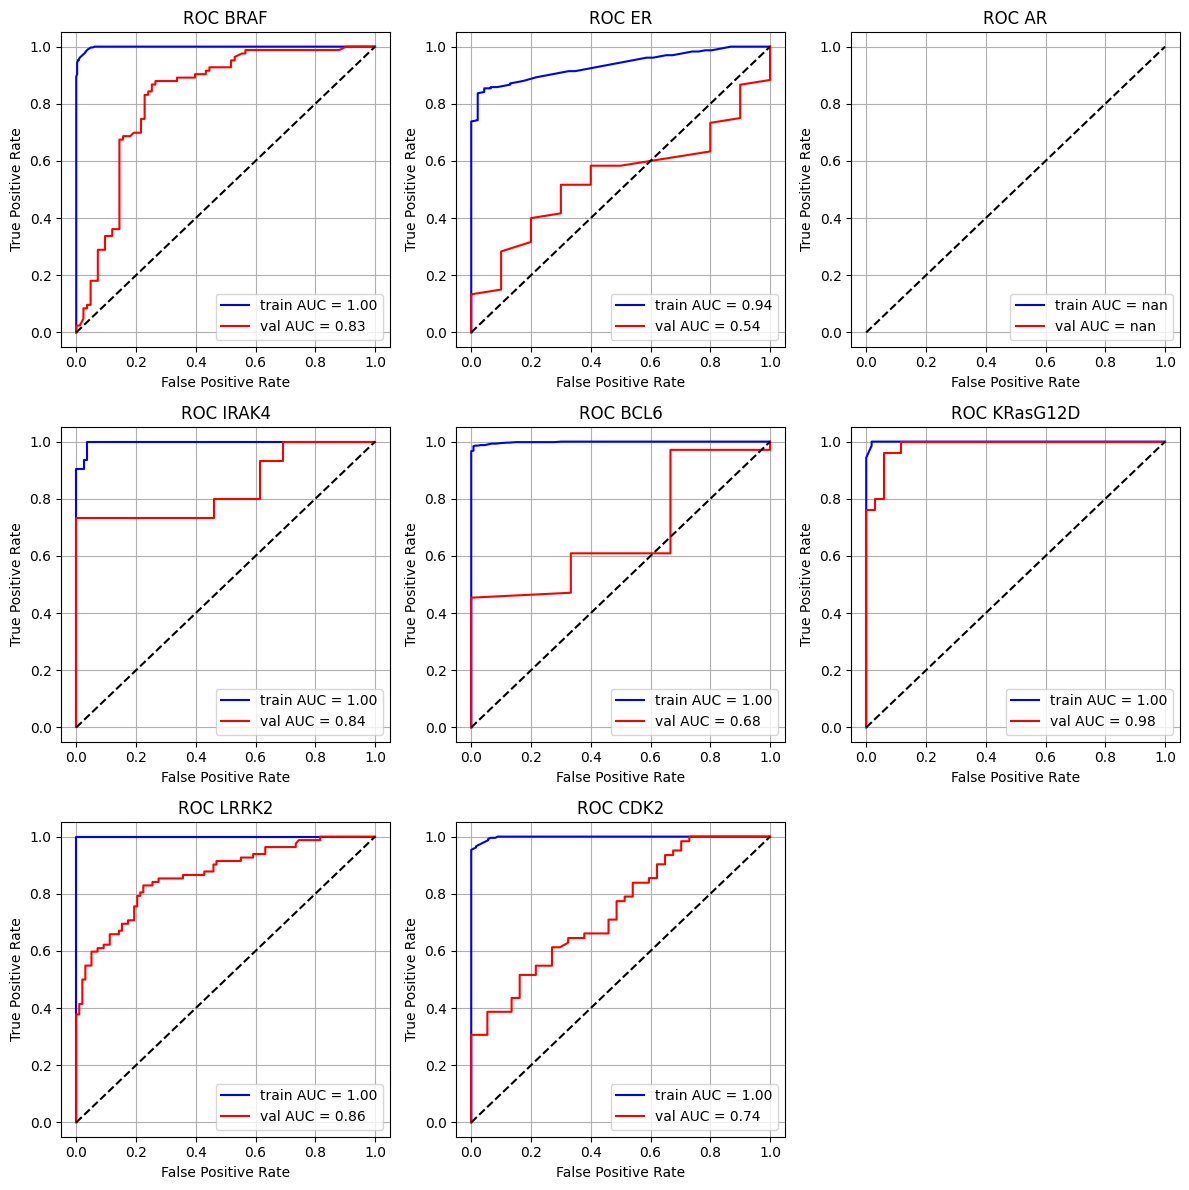

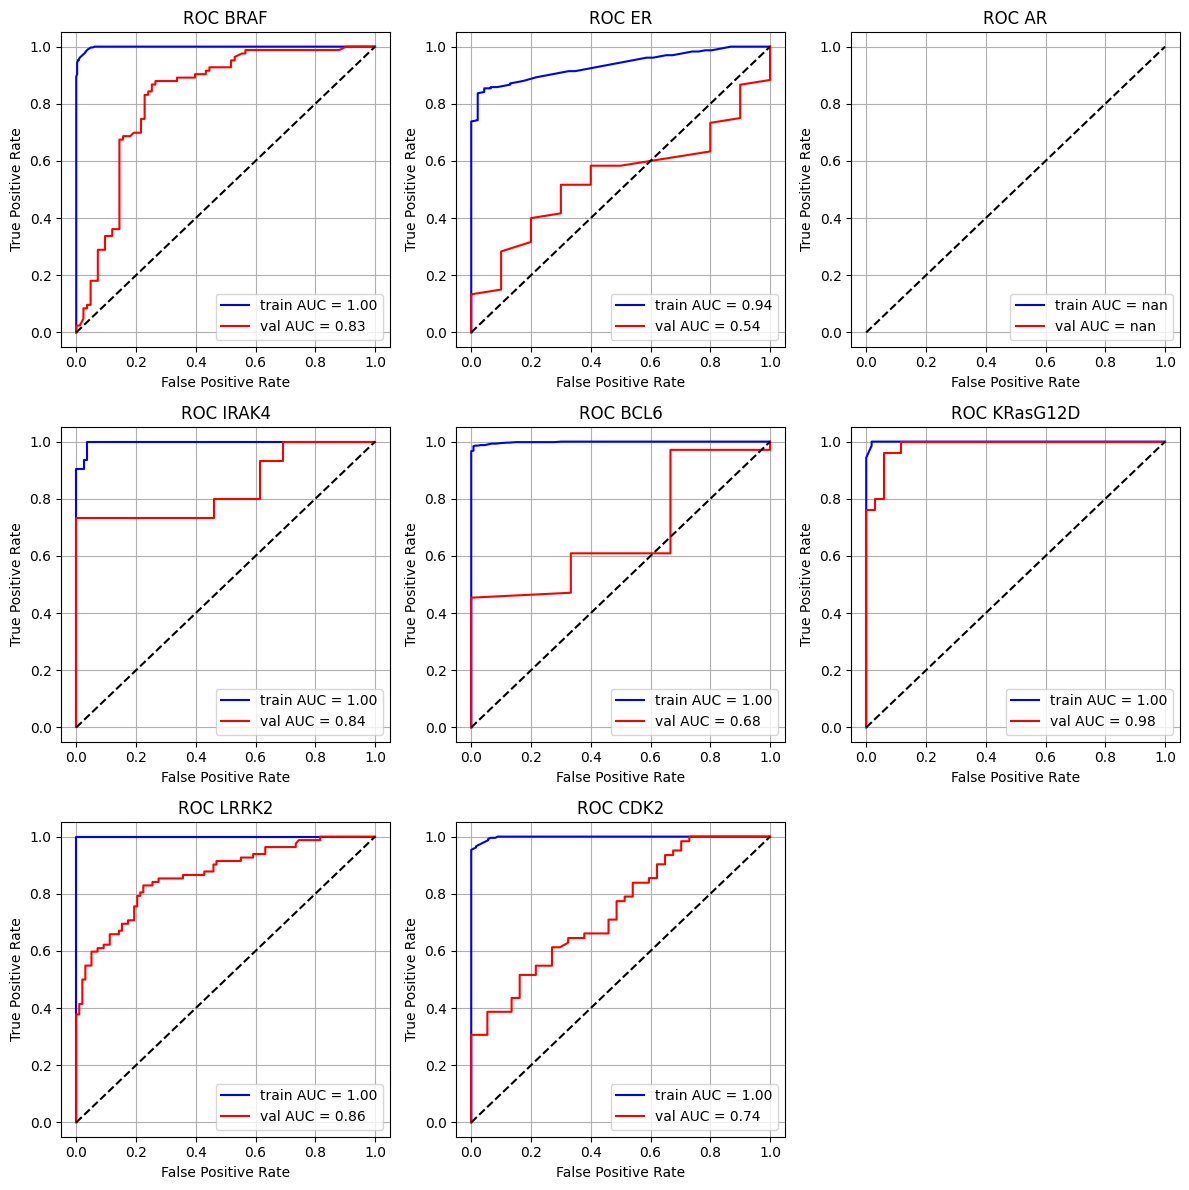

In [4]:
new_parent_model = copy.deepcopy(parent_trainer.model)
new_parent_model.load_state_dict(copy.deepcopy(parent_trainer.best_model_state_dict))
X_train, X_test, Y_train, Y_test, dataset_metadata = load_dataset('DATA/processed/40nm_parent_ECFP12_2048bit')
mm = SavedTrainerPlotter(new_parent_model, X_train, X_test, Y_train, Y_test, dataset_metadata['targets'], component=False)
mm.plot_roc()
# idk why there is two printing out in notebook

(3228, 3, 2048)
(3228, 6144)
(3228, 6144)
(811, 6144)


/home/jacob.gerlach@corp.arvinas.com/Documents/repos/linkerology_multitask/venv/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/home/jacob.gerlach@corp.arvinas.com/Documents/repos/linkerology_multitask/venv/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


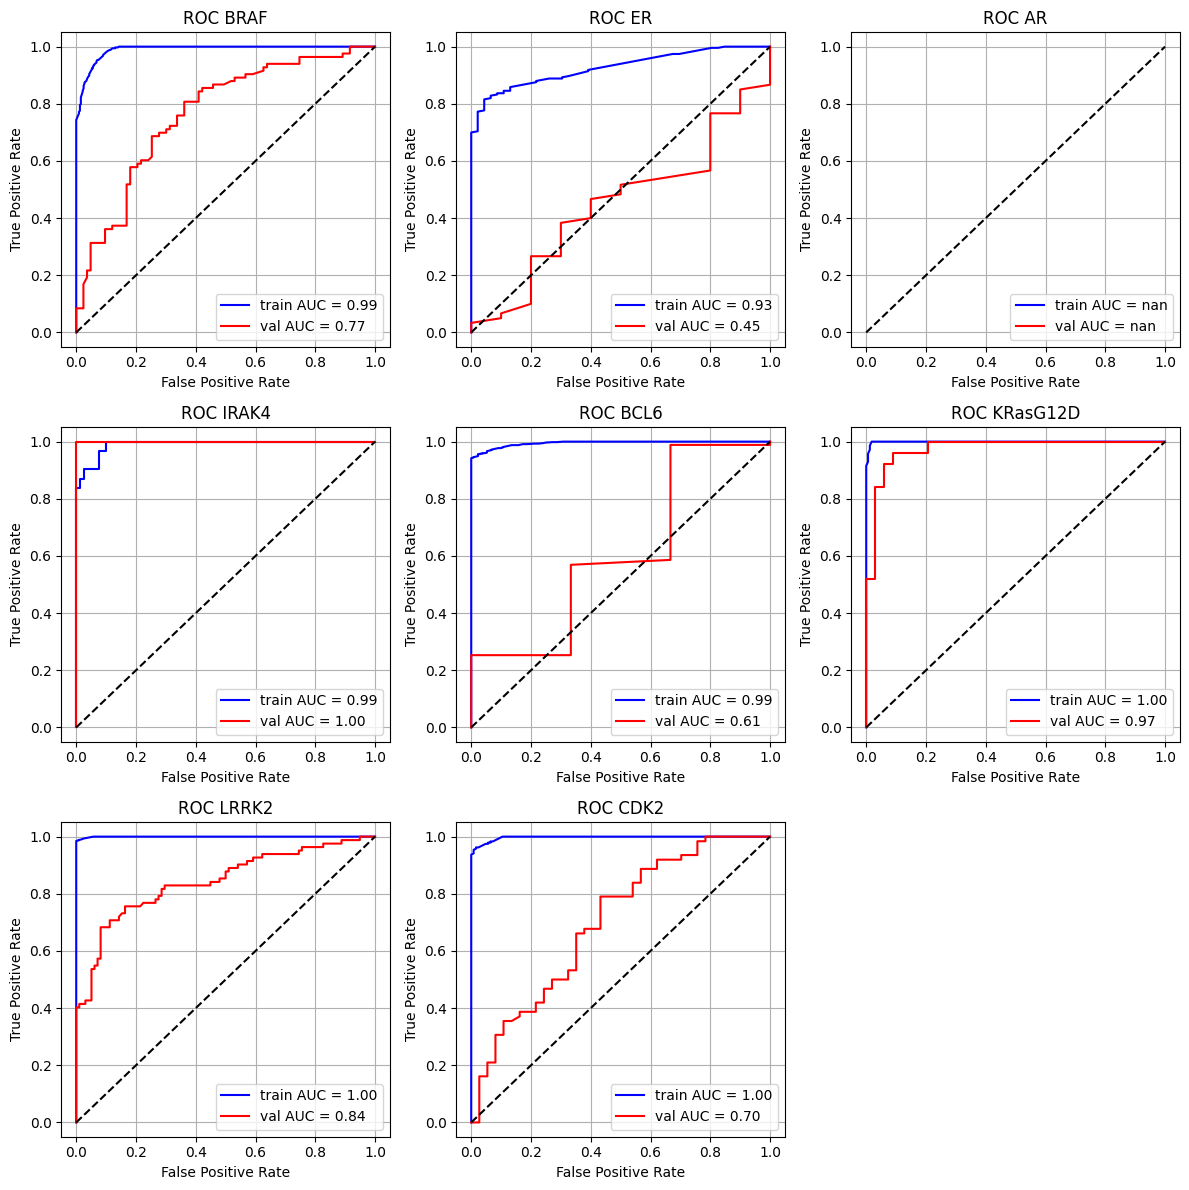

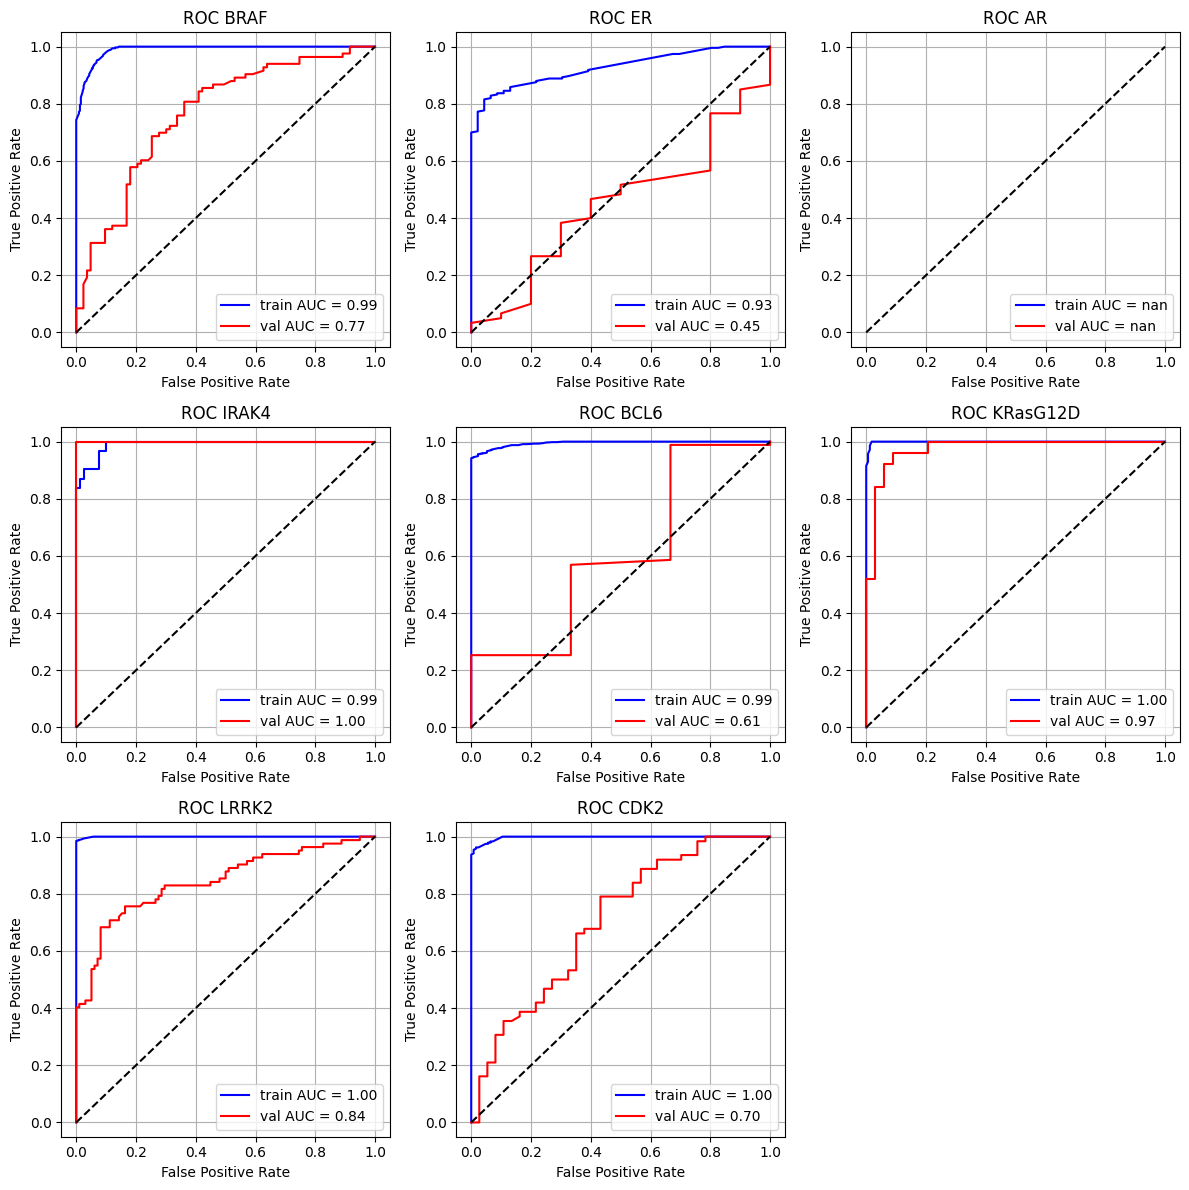

In [5]:
new_component_model = copy.deepcopy(component_trainer.model)
new_component_model.load_state_dict(copy.deepcopy(component_trainer.best_model_state_dict))
X_train, X_test, Y_train, Y_test, dataset_metadata = load_dataset('DATA/processed/40nm_component_ECFP12_2048bit')
mm = SavedTrainerPlotter(new_component_model, X_train, X_test, Y_train, Y_test, dataset_metadata['targets'], component=True)
mm.plot_roc()
# idk why there is two printing out in notebook